For first tutorial. Here are the basic activities to do with Julia:
 
1. Create a script that approximates the series $\sum_{k=1}^\infty 1/k^2$.  It needs to be close to $\pi^2/6$
1. Create scripts that plot the distributions, using histogram of random quantities generated from random matrices:
     * The random matrices are always of the form 2rand(m,n) .- 1 (these are always entries between [-1 and +1]
     * Use N = $10^4$ or N = $10^5$ or N = $10^6$ for the number of matrices
     * Compute:
        1. Determinant of m=2,n=2, m=3,n=3.
        1. sum(inv(A)*A-I) for n = 50, m = 50
        1. $||u||~||v|| - |u^Tv|$ when u and v are the first two cols of a matrix with m = 4 n =2

1. Run: https://github.com/h-Klok/StatsWithJuliaBook/blob/master/1_chapter/polyRoots.jl and test it for different polynomials.
1. Run: https://github.com/h-Klok/StatsWithJuliaBook/blob/master/1_chapter/plotSimple.jl and change the functions plotted
 
 

In [5]:
#1 
N = 10000
sum([1/k^2 for k in 1:N]) - π^2/6  #\pi + [TAB] creates π

-9.99950001654426e-5

In [6]:
using Plots  #for this to work need (first time) using Pkg; Pkg.add("Plots")

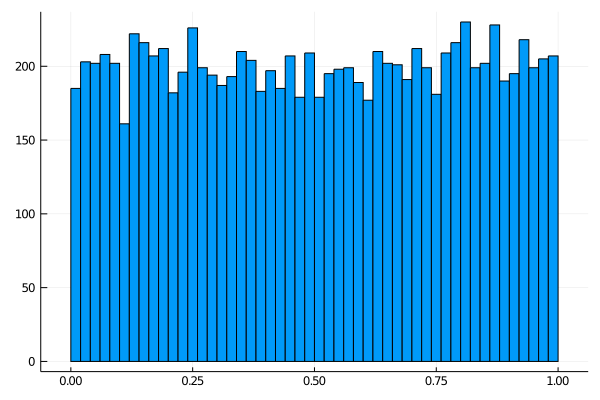

In [10]:
histogram(rand(10000),label = false,nbins = 50)

In [16]:
m = 2
n = 2
2rand(m,n) .- 1   # .- subtracts the scalar from the matrix

2×2 Array{Float64,2}:
 -0.60046   -0.332021
  0.977631   0.478006

In [17]:
myRandMat() = 2rand(m,n) .- 1

myRandMat (generic function with 1 method)

In [18]:
myRandMat()

2×2 Array{Float64,2}:
 0.133325  0.333212
 0.193161  0.717088

In [20]:
using LinearAlgebra #needed for norm(), det() etc...
det(myRandMat())

-0.2691347050541492

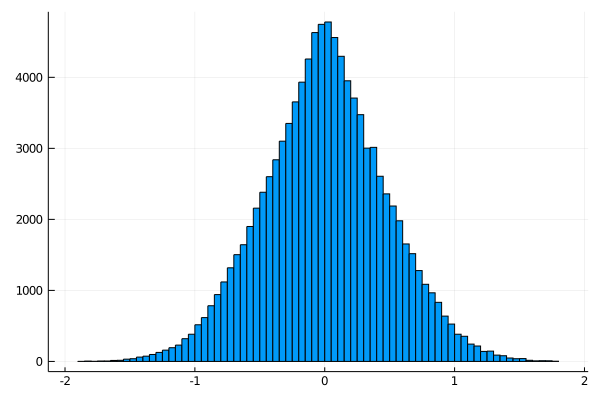

In [25]:
N = 10^5
data = [det(myRandMat()) for _ in 1:N]
histogram(data,label=false,bins = 100)

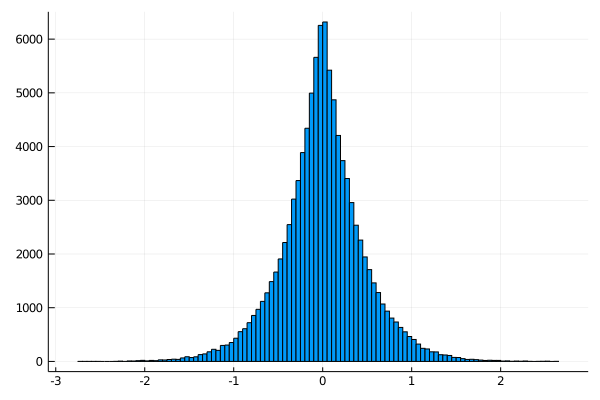

In [28]:
N = 10^5
m,n = 3,3
data = [det(myRandMat()) for _ in 1:N]
histogram(data,label=false,bins = 100)

In [38]:
m,n = 50, 50
N = 10^4

data = []

for _ in 1:N
    A = myRandMat()
    Ai = inv(A)
    err = sum(A*Ai - I) #Frobenious norm is sum of elements of matrix
    push!(data,err)
end

In [39]:
histogram(data)

In [40]:
sort(data)

10000-element Array{Any,1}:
 -1.2557183857966786e-10
 -1.0779259678214978e-10
 -6.457436353532225e-11
 -5.064130625916892e-11
 -3.436418431306711e-11
 -2.1343967231332658e-11
 -1.5792328415391596e-11
 -1.425260540665485e-11
 -1.3781521720578075e-11
 -1.2827241163969657e-11
 -1.249032111195742e-11
 -1.1439050310175193e-11
 -1.1197502692109576e-11
  ⋮
  1.5318614164034953e-11
  1.927703083412007e-11
  2.1056719415820387e-11
  2.17450936879419e-11
  2.5264689530332656e-11
  2.7273488210090085e-11
  2.8372624076213456e-11
  2.847652849922245e-11
  3.4179111619849235e-11
  3.7799316303833204e-11
  4.0481744771894714e-11
  1.6068137507652965e-10

In [41]:
maximum(data)

1.6068137507652965e-10

In [ ]:
#try to use filter() for filtering out the outliers....

## Now we are doing 2c

In [43]:
m,n = 4, 2
N = 10^4

data = []

for _ in 1:N
    A = myRandMat()
    u = A[:,1]
    v = A[:,2]
    err = norm(u)*norm(v)-abs(u'*v) #Cauchy Schwartz says this is positive
    push!(data,err)
end

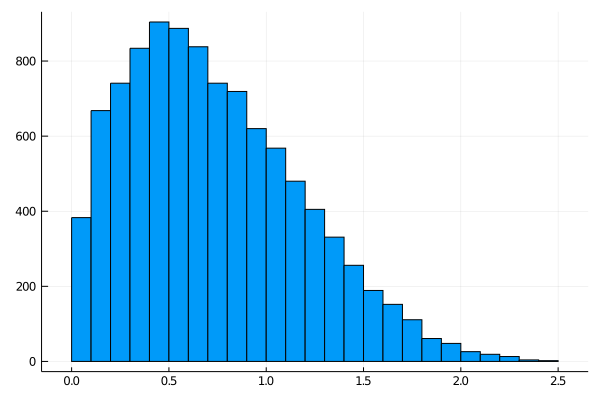

In [45]:
histogram(data,legend=false)

In [ ]:
#maybe need using Pkg; Pkg.add("Roots")

In [46]:
using Roots #around page 20 here: https://statisticswithjulia.org/StatisticsWithJuliaDRAFT.pdf

function polynomialGenerator(a...)
    n = length(a)-1
    poly =  function(x)
                return sum([a[i+1]*x^i for i in 0:n])
            end
    return poly
end

polynomial = polynomialGenerator(1,3,-10)
zeroVals = find_zeros(polynomial,-10,10)
println("Zeros of the function f(x): ", zeroVals)

Zeros of the function f(x): [-0.19999999999999998, 0.5]


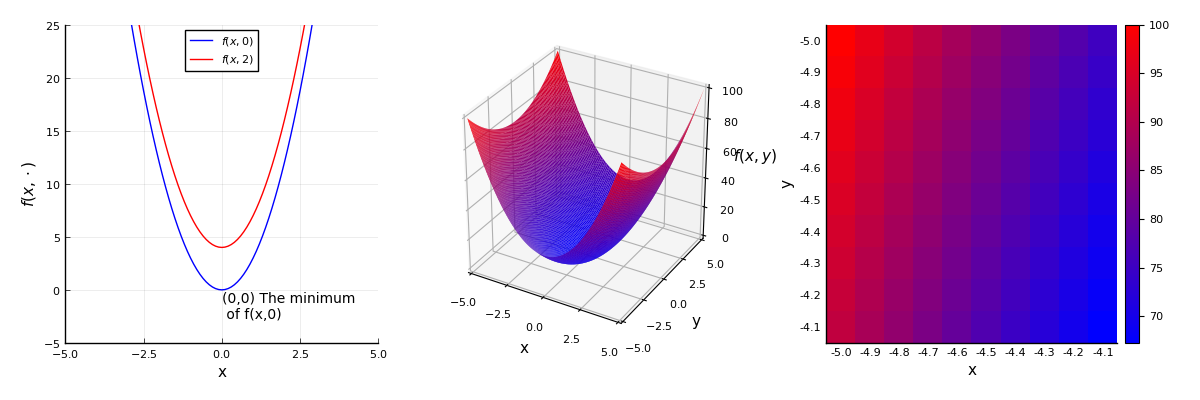

In [48]:
using Plots, LaTeXStrings, Measures; pyplot() #around page 26 here: https://statisticswithjulia.org/StatisticsWithJuliaDRAFT.pdf

f(x,y) = 3x^2 + y^2
f0(x) = f(x,0)
f2(x) = f(x,2)

xVals, yVals = -5:0.1:5 , -5:0.1:5
plot(xVals, [f0.(xVals), f2.(xVals)], 
	c=[:blue :red], xlims=(-5,5), legend=:top,
	ylims=(-5,25), ylabel=L"f(x,\cdot)", label=[L"f(x,0)" L"f(x,2)"])
p1 = annotate!(0, -0.2, text("(0,0) The minimum\n of f(x,0)", :left, :top, 10))

z = [ f(x,y) for y in yVals, x in xVals ]
p2 = surface(xVals, yVals, z, c=cgrad([:blue, :red]),legend=:none, 
	ylabel="y", zlabel=L"f(x,y)")

M = z[1:10,1:10]
p3 = heatmap(M, c=cgrad([:blue, :red]), yflip=true, ylabel="y",  
	xticks=([1:10;], xVals), yticks=([1:10;], yVals))

plot(p1, p2, p3, layout=(1,3), size=(1200,400), xlabel="x", margin=5mm)